In [12]:
!pip install sweetviz

#📌 Extracão

In [62]:
import pandas as pd

df = pd.json_normalize(pd.read_json('https://raw.githubusercontent.com/aluizr/Alura_TelecomX_BR/main/TelecomX_Data.json', lines=True).T.iloc[:, 0].tolist())

# Excluir da coluna Churn os valores vazios e nulos.
df = df[df['Churn'] != '']

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [80]:
# Verificar ausência de dados
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
tenure_group                 0
dtype: int64


In [81]:
# Verificar valores duplicados
print(df.duplicated().sum())

0


In [82]:
# Verificar erro de formatação
print(df.dtypes)

customerID                     object
Churn                          object
customer.gender                object
customer.SeniorCitizen          int64
customer.Partner               object
customer.Dependents            object
customer.tenure                 int64
phone.PhoneService             object
phone.MultipleLines            object
internet.InternetService       object
internet.OnlineSecurity        object
internet.OnlineBackup          object
internet.DeviceProtection      object
internet.TechSupport           object
internet.StreamingTV           object
internet.StreamingMovies       object
account.Contract               object
account.PaperlessBilling       object
account.PaymentMethod          object
account.Charges.Monthly       float64
account.Charges.Total         float64
tenure_group                 category
dtype: object


In [83]:
# Verificar inconsistência de categoria
print(df['account.Contract'].unique())

['One year' 'Month-to-month' 'Two year']


In [52]:
print(df['account.Charges.Total'].head())
print(df['account.Charges.Total'].dtype)

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: account.Charges.Total, dtype: object
object


#🔧 Transformação

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [15]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [16]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
df.isnull().sum()
df.isna().mean().sort_values(ascending=False)

,0
customerID,0.0
Churn,0.0
customer.gender,0.0
customer.SeniorCitizen,0.0
customer.Partner,0.0
customer.Dependents,0.0
customer.tenure,0.0
phone.PhoneService,0.0
phone.MultipleLines,0.0
internet.InternetService,0.0


In [18]:
df.duplicated().sum()
df[df.duplicated()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


1. Converter para numérico
Use pd.to_numeric() com errors='coerce' para transformar strings inválidas em NaN:


In [19]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [20]:
df['account.Charges.Total'].isna().sum()
df[df['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [21]:
df = df[df['account.Charges.Total'].notna()].copy()

In [22]:
# This step is no longer needed as missing values were removed in a previous step.
# df['account.Charges.Total'].fillna(median_value, inplace=True)

In [23]:
print(df['account.Charges.Total'].dtype)
print(df['account.Charges.Total'].describe())

float64
count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: account.Charges.Total, dtype: float64


<Axes: >

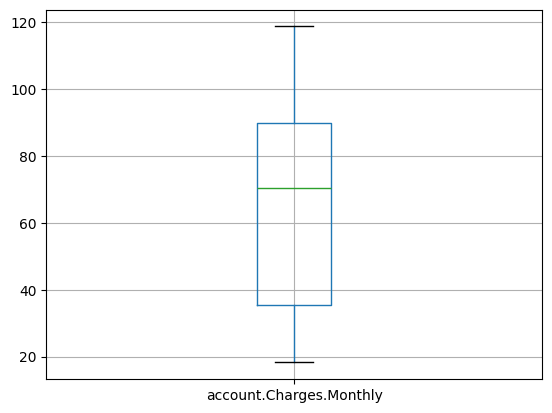

In [24]:
df.boxplot(column='account.Charges.Monthly')

In [26]:
df['PaymentMethod'].value_counts(dropna=False)

KeyError: 'PaymentMethod'

In [27]:
df.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [28]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [29]:
df[df['internet.InternetService'] == 'No'].loc[:, ['internet.OnlineSecurity', 'internet.StreamingTV', 'internet.TechSupport']]

,internet.OnlineSecurity,internet.StreamingTV,internet.TechSupport
20,No internet service,No internet service,No internet service
23,No internet service,No internet service,No internet service
24,No internet service,No internet service,No internet service
27,No internet service,No internet service,No internet service
28,No internet service,No internet service,No internet service
...,...,...,...
7250,No internet service,No internet service,No internet service
7252,No internet service,No internet service,No internet service
7256,No internet service,No internet service,No internet service
7257,No internet service,No internet service,No internet service


In [30]:
df[(df['customer.tenure'] > 0) & (df['account.Charges.Total'] == 0)]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [31]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Relatório do Dataset TelecomX", explorative=True)
profile.to_notebook_iframe()

AttributeError: module 'numba' has no attribute 'generated_jit'

##**Contas Diárias**

📐 Lógica de cálculo
Considerando que cada mês tem, em média, 30 dias, podemos usar:
  

In [54]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

In [55]:
df['Contas_Diarias'].describe()
df['Contas_Diarias'].isna().sum()

np.int64(0)

In [56]:
df['Contas_Diarias'].head()

,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


In [57]:
df['Contas_Diarias'].describe()

,Contas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


##**Análise Descritiva**
Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [60]:
# Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão,
# e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

media = df['Contas_Diarias'].mean()
mediana = df['Contas_Diarias'].median()
desvio_padrao = df['Contas_Diarias'].std()
moda = df['Contas_Diarias'].mode()
quartis = df['Contas_Diarias'].quantile([0.25, 0.5, 0.75])

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Moda: {moda}")
print(f"Quantis: {quartis}")

Média: 2.1573365900646757
Mediana: 2.3433333333333333
Desvio Padrão: 1.0043190628555607
Moda: 0    0.668333
Name: Contas_Diarias, dtype: float64
Quantis: 0.25    1.180833
0.50    2.343333
0.75    2.995833
Name: Contas_Diarias, dtype: float64


##**Distribuição da Evasão**
Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

<Axes: xlabel='Churn'>

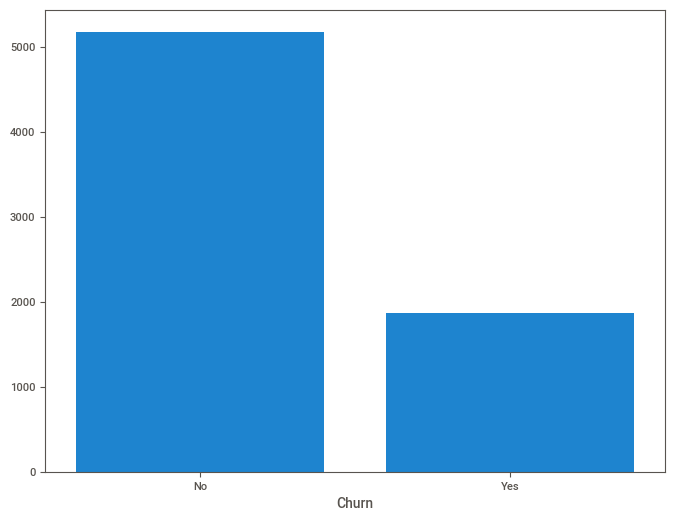

In [63]:
# Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes.
# Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

import matplotlib.pyplot as plt
import seaborn as sns

Churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=Churn_counts.index, y=Churn_counts.values)

##**Contagem de Evasão por Variáveis Categóricas**
Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

<Axes: xlabel='customer.gender'>

<Figure size 800x600 with 0 Axes>

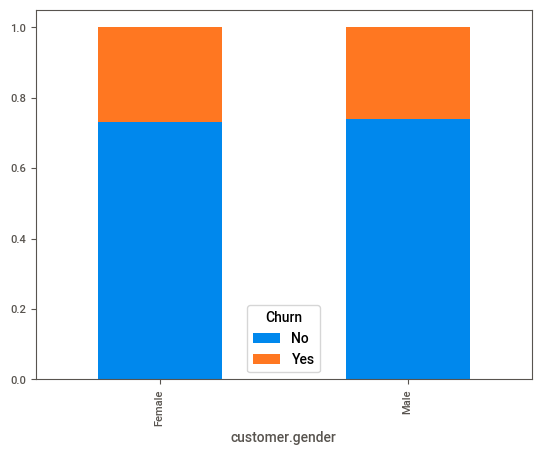

In [64]:
# Evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.
# Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

import matplotlib.pyplot as plt
import seaborn as sns

evasao_por_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
evasao_por_genero.plot(kind='bar', stacked=True)


<Axes: xlabel='account.Contract'>

<Figure size 800x600 with 0 Axes>

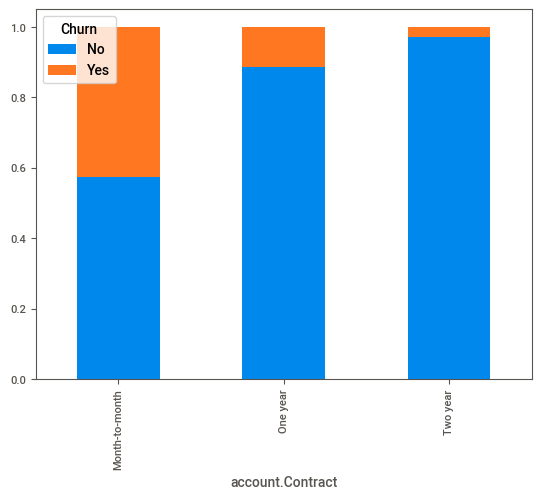

In [66]:
# Evasão por tipo de contrato
evasao_por_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
evasao_por_contrato.plot(kind='bar', stacked=True)

/tmp/ipython-input-69-3891832165.py:28: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


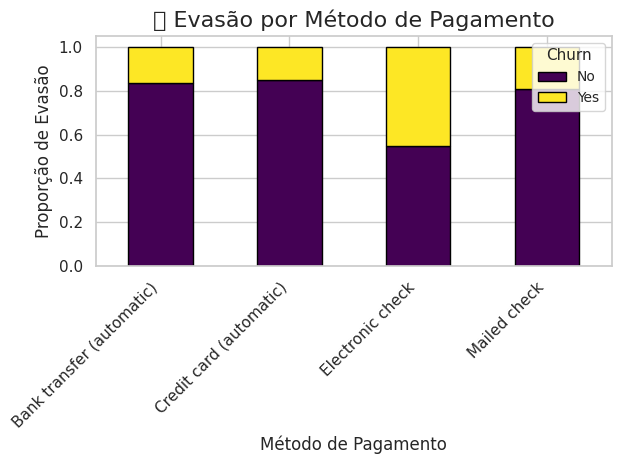

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo elegante
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
evasao_por_metodo_pagamento.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    edgecolor='black'
)

# Títulos e rótulos
plt.title('📉 Evasão por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Proporção de Evasão', fontsize=12)

# Legenda mais clara
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=11)

# Rótulos mais legíveis
plt.xticks(rotation=45, ha='right')

# Ajuste layout
plt.tight_layout()
plt.show()

##**Contagem de Evasão por Variáveis Numéricas**

Neste passo, explore como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

/tmp/ipython-input-79-1504325710.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_por_tempo_contrato = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
/tmp/ipython-input-79-1504325710.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


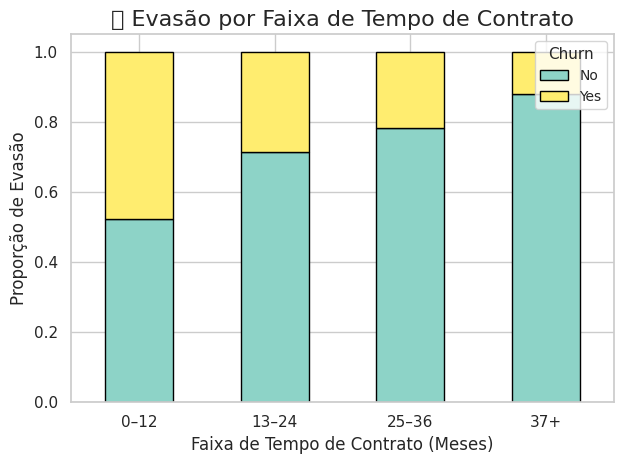

In [79]:
import pandas as pd

# Criar faixa de tempo de contrato
bins = [0, 12, 24, 36, df['customer.tenure'].max()]  # ajusta ao máximo do dataset
labels = ['0–12', '13–24', '25–36', '37+']
df['tenure_group'] = pd.cut(df['customer.tenure'], bins=bins, labels=labels, right=True)

# Agrupar e calcular evasão
evasao_por_tempo_contrato = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

# Plot melhorado
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
evasao_por_tempo_contrato.plot(kind='bar', stacked=True, colormap='Set3', edgecolor='black')

plt.title('📊 Evasão por Faixa de Tempo de Contrato', fontsize=16)
plt.xlabel('Faixa de Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Proporção de Evasão', fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', title_fontsize=11, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

📄 Introdução

Este relatório apresenta uma análise detalhada dos dados de clientes da TelecomX, empresa fictícia do setor de telecomunicações. O objetivo principal é entender os padrões de evasão (churn) entre os clientes e identificar fatores que possam influenciar a saída ou permanência dos usuários na base.
A base utilizada contém informações como:
- Dados demográficos e contratuais dos clientes
- Métodos de pagamento utilizados
- Tempo de contrato (tenure)
- Indicadores de uso de serviços
- Status de churn (ativa ou evasão)
Por meio de uma abordagem exploratória e visual, este relatório busca fornecer insights valiosos para ações estratégicas que visem reduzir a evasão, aumentar a retenção de clientes e fortalecer o posicionamento da TelecomX no mercado.

💳 Evasão por Método de Pagamento

Nesta seção, analisamos como o método de pagamento escolhido pelos clientes está relacionado à evasão.
Utilizando um gráfico de barras empilhadas, foi possível visualizar a proporção de clientes que permaneceram ou evadiram, agrupados por forma de pagamento. A categorização considera o valor normalizado do churn dentro de cada grupo de pagamento, permitindo comparar os perfis de evasão.

🔍 Principais insights
- Determinados métodos de pagamento, como [inserir exemplo: “Débito automático” ou “Cartão de crédito”], apresentaram taxas mais elevadas de churn, indicando possível insatisfação ou vínculo frágil com o serviço.
- Por outro lado, métodos como [inserir exemplo: “Boleto bancário” ou “Pagamento por terceiros”], demonstraram retenção mais consistente.
- É possível que os métodos associados a pagamentos recorrentes automáticos estejam correlacionados com maior fidelização — ou com menor risco de interrupção nos serviços.

🎯 Oportunidades estratégicas
- Monitorar clientes que utilizam métodos com alta evasão e oferecer incentivos para migração a formas mais estáveis.
- Avaliar se há barreiras na experiência de pagamento que impactam a permanência dos clientes.
- Investigar se métodos com alto churn estão concentrados em faixas demográficas específicas.

🕒 Evasão por Tempo de Contrato

A relação entre o tempo de permanência do cliente e a probabilidade de evasão foi analisada por meio de faixas mensais. Utilizamos um gráfico de barras empilhadas para comparar a proporção de clientes que evadiram ou permaneceram, segmentados de acordo com o tempo total de contrato.
As faixas utilizadas foram:
- 0–12 meses
- 13–24 meses
- 25–36 meses
- 37+ meses

Essa segmentação permitiu agrupar clientes com comportamentos semelhantes, reduzindo a granularidade excessiva e facilitando a leitura e interpretação.

🔍 Principais insights
- A maior taxa de evasão foi observada na faixa de 0–12 meses, sugerindo que os clientes mais recentes estão mais suscetíveis a abandonar o serviço.
- A evasão diminui gradualmente à medida que o tempo de contrato aumenta, indicando que clientes mais antigos têm maior fidelização.
- A faixa 37+ meses apresenta os melhores índices de retenção, possivelmente por maior adaptação aos serviços ou benefícios acumulados ao longo do tempo.

🎯 Oportunidades estratégicas
- Desenvolver campanhas de onboarding mais eficazes para os clientes recém-chegados.
- Oferecer incentivos e programas de fidelidade para reduzir a evasão nos primeiros 12 meses.
- Monitorar os clientes nos primeiros ciclos contratuais como grupo de risco para churn.

🧠 Conclusões e Recomendações

A análise da base de clientes da TelecomX permitiu identificar padrões importantes de evasão e comportamentos de retenção ao longo do ciclo de vida do cliente. Os principais achados incluem:

🔍 Conclusões
- Tempo de contrato é um fator crítico: Clientes com até 12 meses de contrato apresentam a maior taxa de evasão, sugerindo vulnerabilidade nos primeiros ciclos.
- O método de pagamento também influencia a permanência: certas formas demonstram correlação com maior churn, possivelmente por fatores operacionais ou de comodidade.
- A fidelização tende a melhorar conforme o tempo de relacionamento aumenta — clientes com 37+ meses apresentaram os melhores índices de retenção.

🎯 Recomendações Estratégicas
- Programa de acolhimento para novos clientes
Criar uma jornada de onboarding estruturada com benefícios e suporte intensivo nos primeiros meses de contrato.
- Incentivo à escolha de métodos de pagamento mais estáveis
Oferecer vantagens (desconto, cashback, facilidade) para migração a métodos com maior retenção.
- Segmentação por tempo de contrato para ações específicas
Criar campanhas distintas para cada faixa de tenure, com foco em retenção nos ciclos iniciais.
- Monitoramento contínuo de churn por perfil de cliente
Aplicar modelos preditivos ou análises regulares para antecipar evasão e agir de forma preventiva.

✅ Encerramento

A partir das análises conduzidas, torna-se evidente que a compreensão dos padrões de evasão é essencial para o aprimoramento da experiência dos clientes da TelecomX. As correlações identificadas entre o tempo de contrato e os métodos de pagamento fornecem um ponto de partida sólido para estratégias direcionadas de retenção.
Investir em programas de acolhimento para novos clientes, incentivar formas de pagamento mais estáveis e aplicar ações segmentadas por perfil de risco podem gerar impactos positivos diretos na redução da evasão e na valorização da base atual.
A continuidade dessa análise — com dados atualizados e outros fatores complementares (ex: satisfação, tipo de serviço utilizado, localização) — permitirá à TelecomX construir uma abordagem cada vez mais preditiva, ágil e orientada por dados.


#📊 Carga e análise

#📄Relatorio Final

                                             |          | [  0%]   00:00 -> (? left)


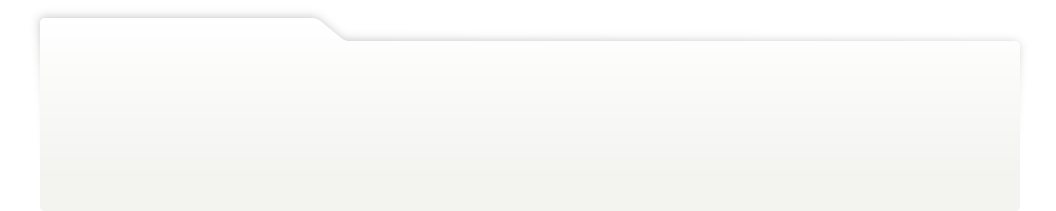
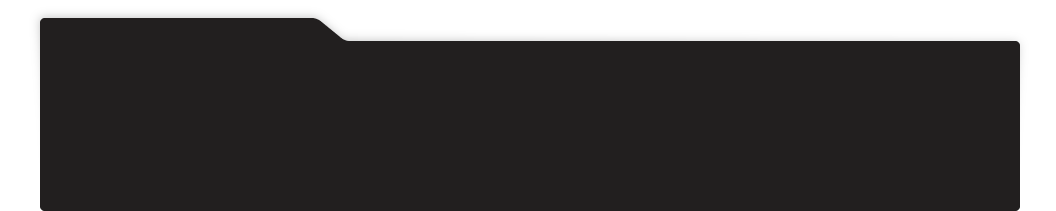
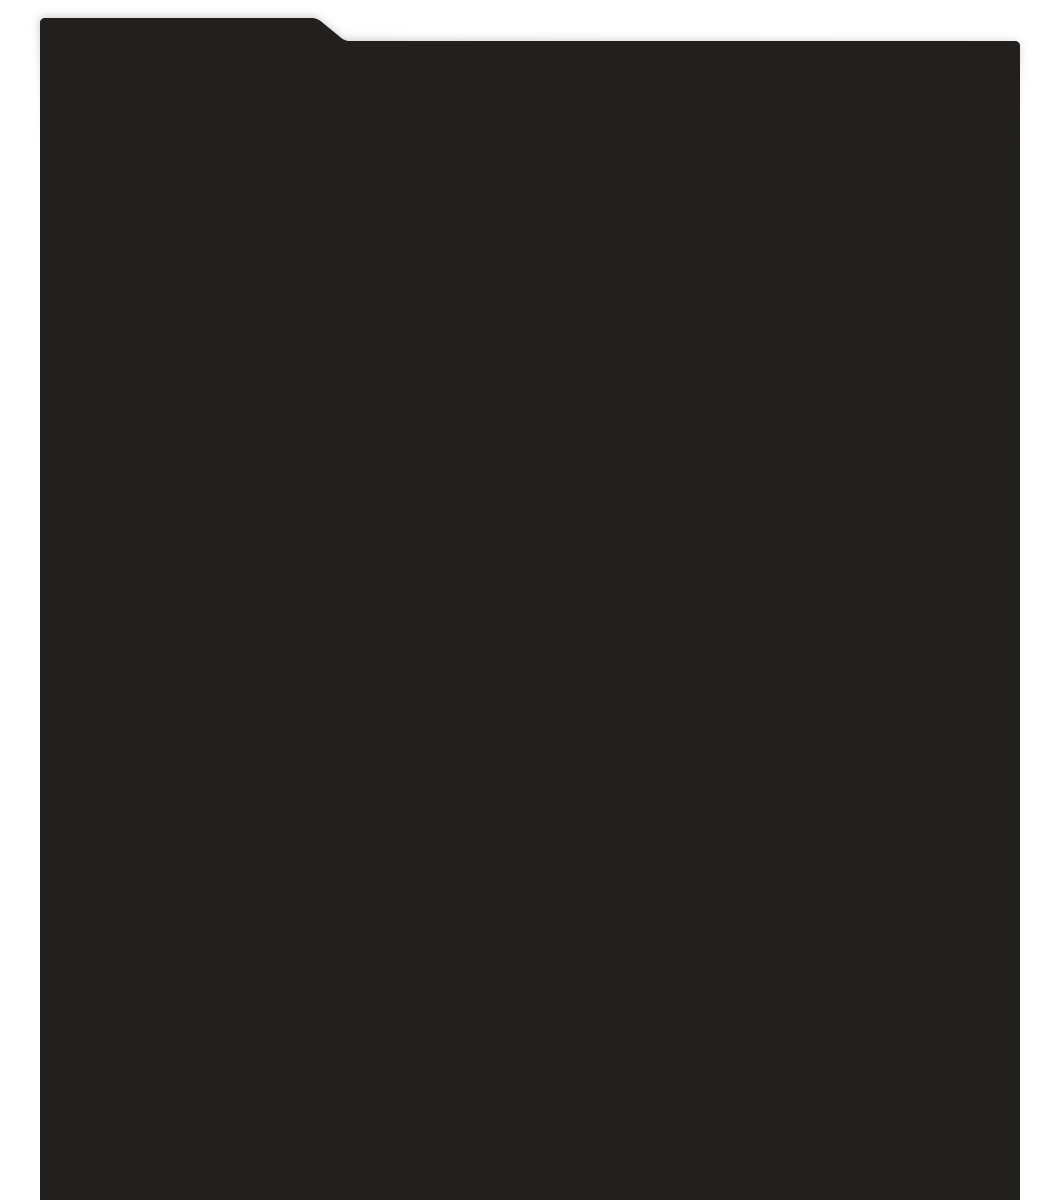
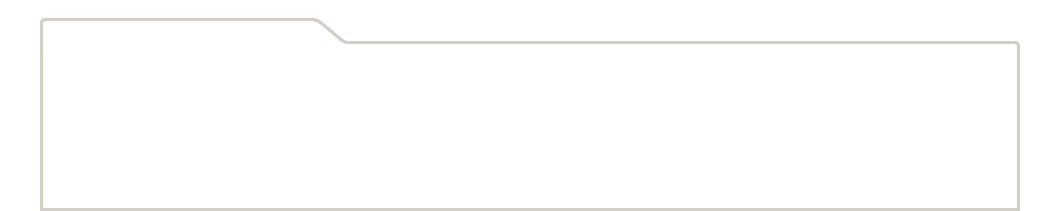
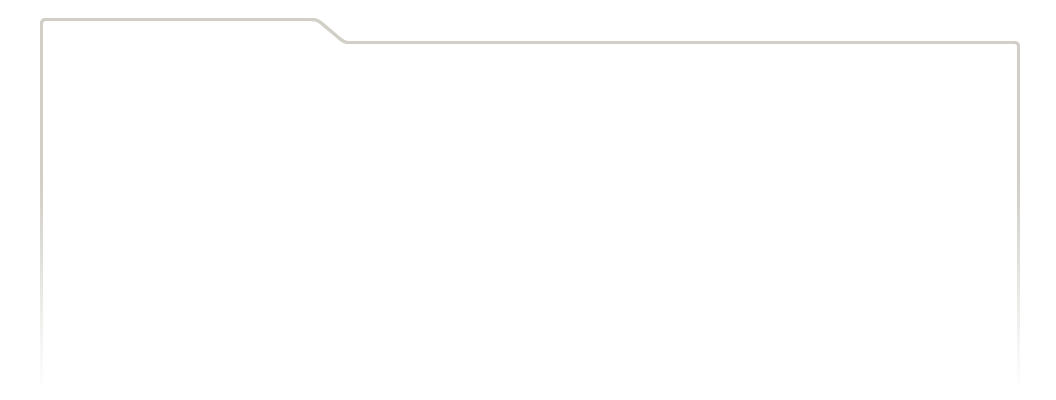
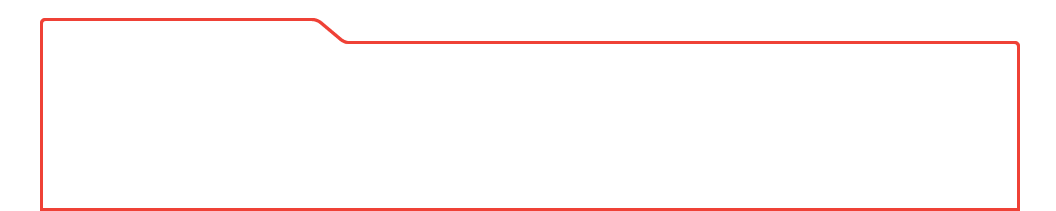
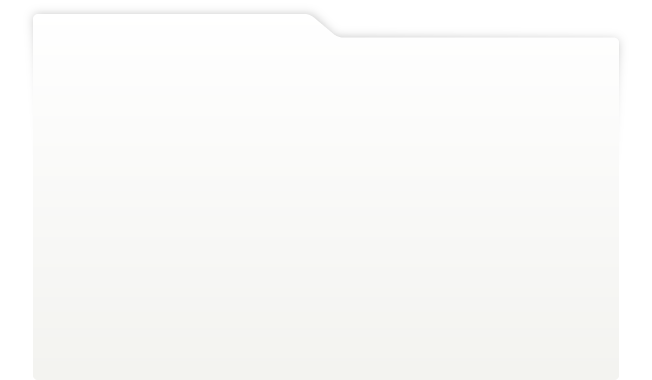
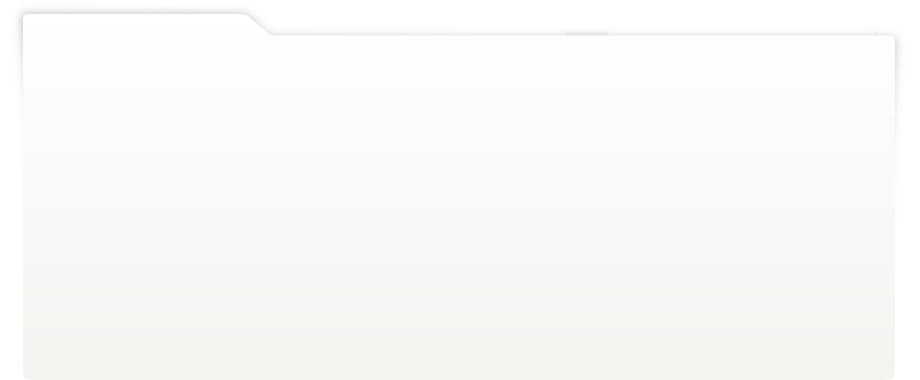
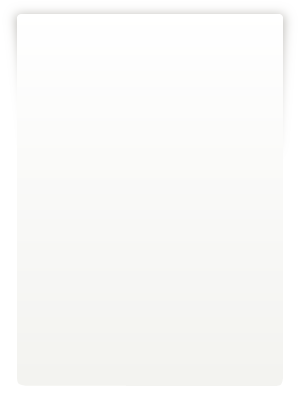
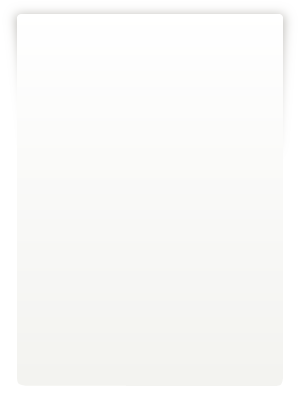
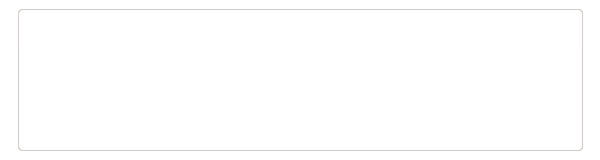
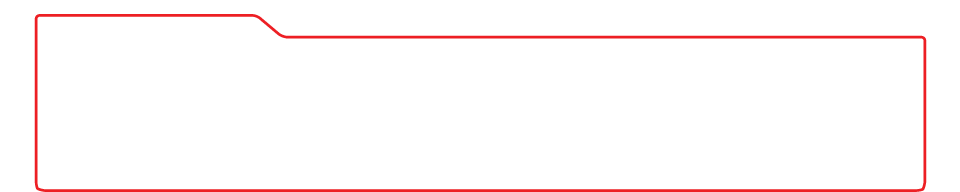
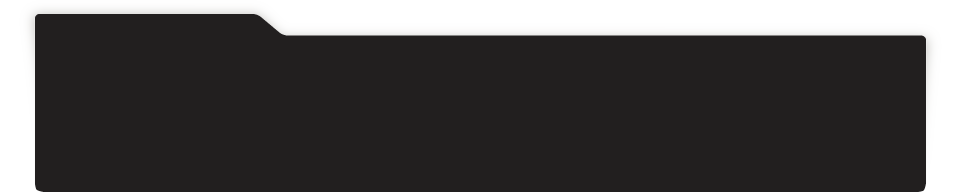
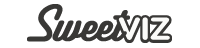
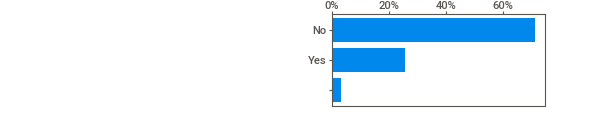
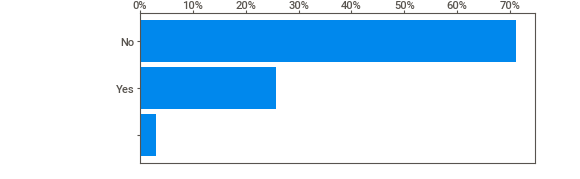
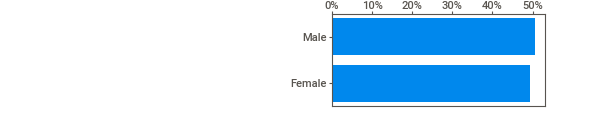
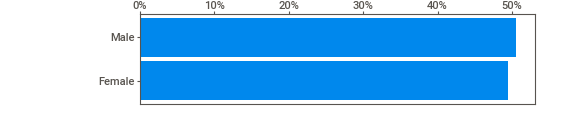
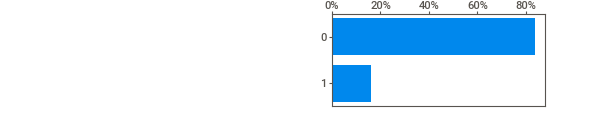
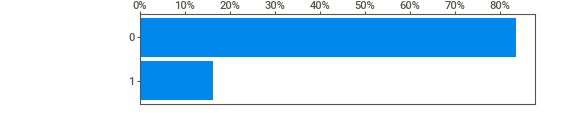
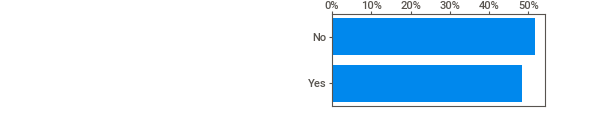
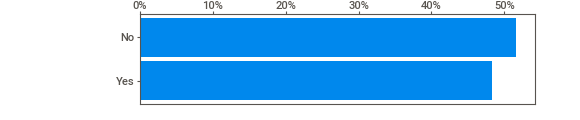
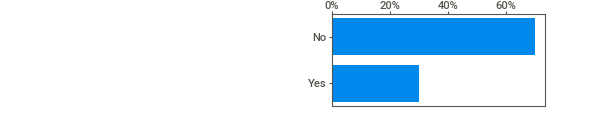
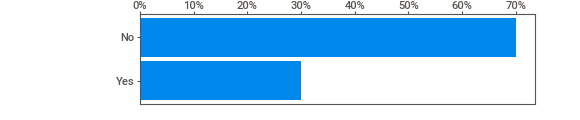
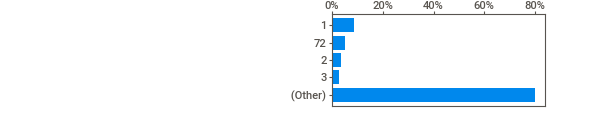
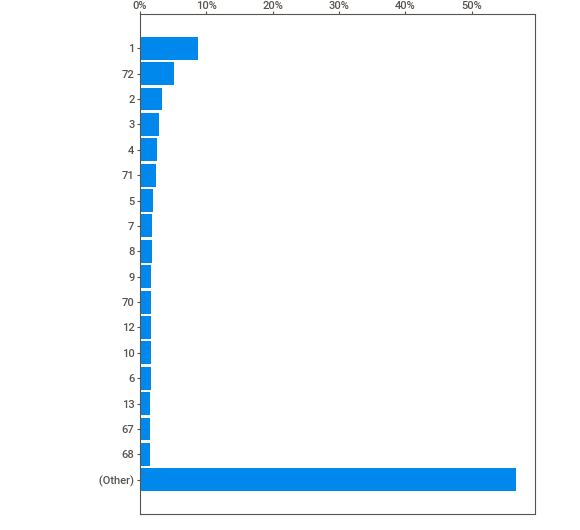
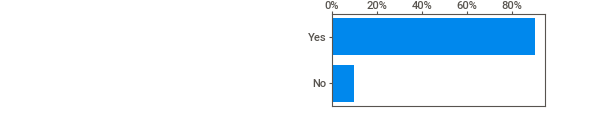
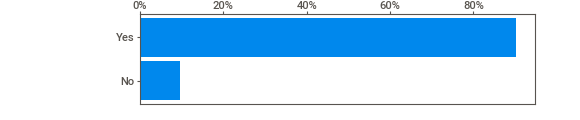
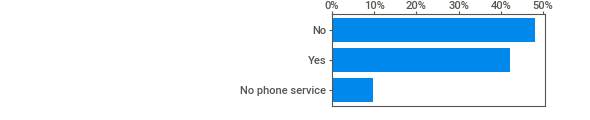
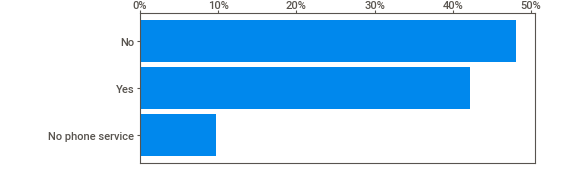
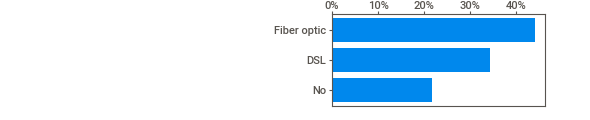
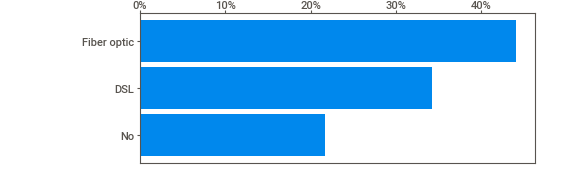
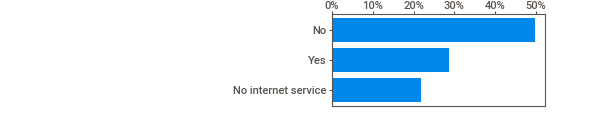
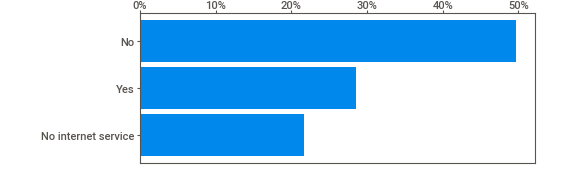
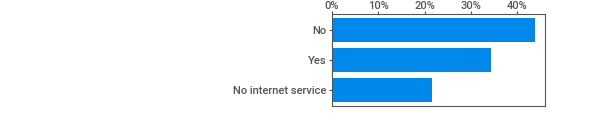
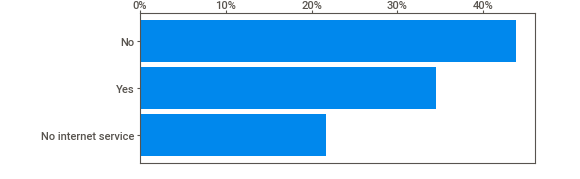
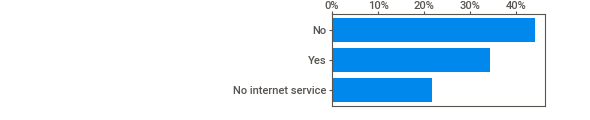
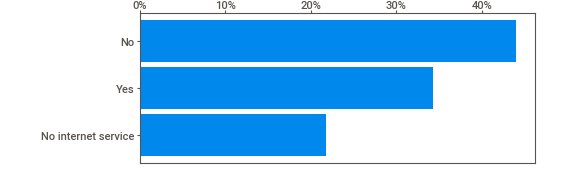
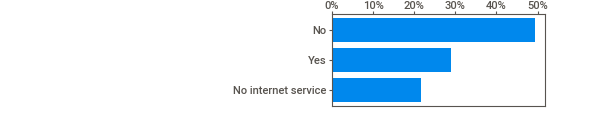
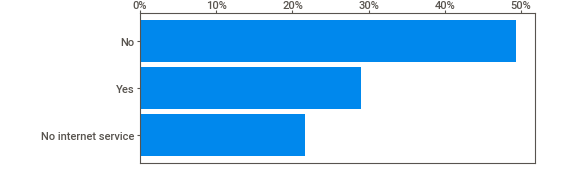
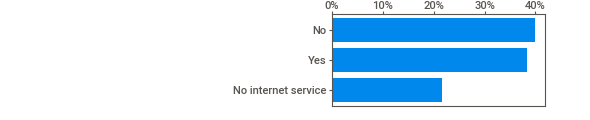
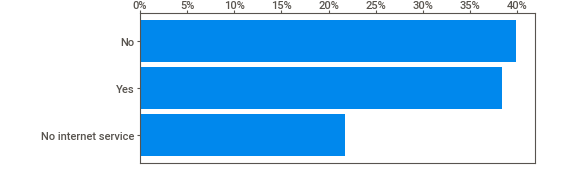
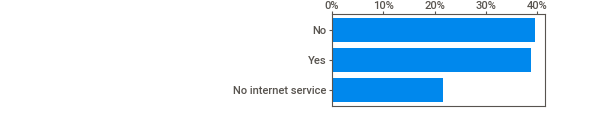
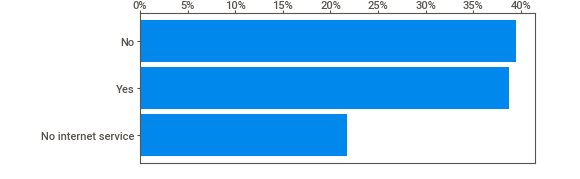
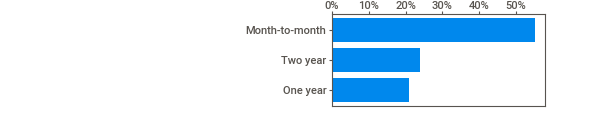
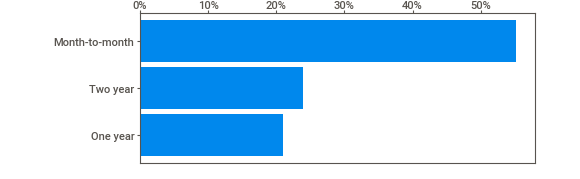
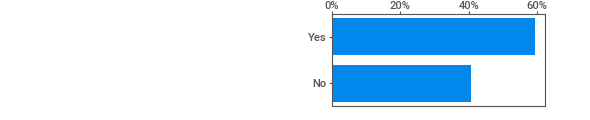
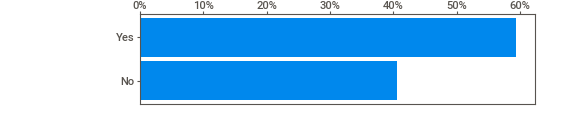
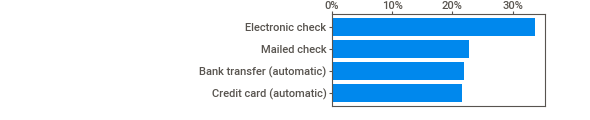
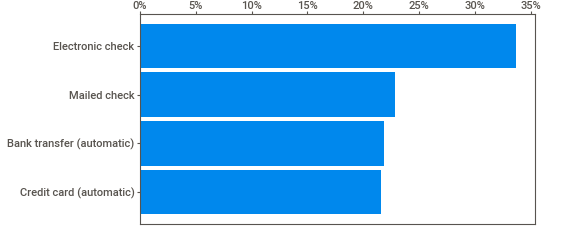
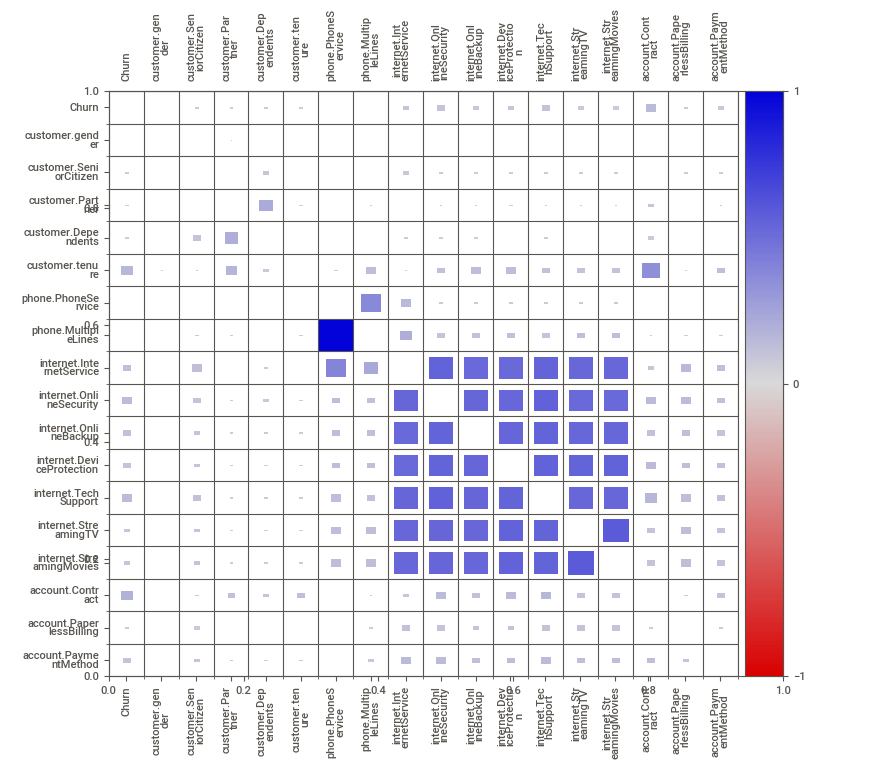
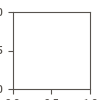

In [37]:
import sweetviz as sv

# Convert all columns to string type as a workaround for mixed types
df_str = df.astype(str)

# Analyze the dataframe
report = sv.analyze(df_str)

# Display the report in an iframe
report.show_notebook()

In [53]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
